In [2]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression as LR  
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [17]:
data = pd.read_csv(r'''C:\Users\solov\DZ36/student_scores.csv''')

In [18]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
x = data['Hours'].to_numpy().reshape(-1, 1)
y = data['Scores'].to_numpy()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

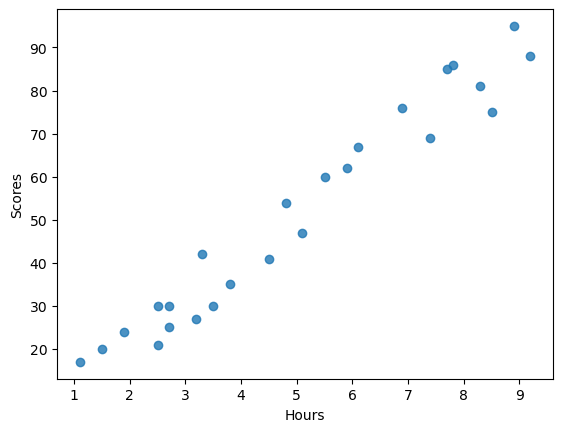

In [20]:
sns.regplot(x = 'Hours', y = 'Scores', data = data, fit_reg = False)

In [21]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 42)

In [22]:
x_train = data_train['Hours'].to_numpy().reshape(-1, 1)
y_train = data_train['Scores']

In [23]:
x_test = data_test['Hours'].to_numpy().reshape(-1, 1)
y_test = data_test['Scores']

In [24]:
model = LR().fit(x_train, y_train)

In [25]:
def get_score_rmse(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    rmse = np.sqrt(model.score(X_test, Y_test))
    return rmse

In [26]:
get_score_rmse(LR(), x_train, x_test, y_train,  y_test)

0.9740455502827889

In [27]:
k_folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [28]:
def array_problem(X, Y, model):
    new_dict = {}
    for train_index, test_index in k_folds.split(x, y):
        X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], \
        Y[train_index], Y[test_index]
        score_fold = get_score_rmse(model, X_train, X_test, Y_train, Y_test)
        print(score_fold)
        new_dict[score_fold] = x[train_index], x[test_index], \
        y[train_index], y[test_index]
    min_score = min(new_dict)
    print(f"We have some problems with array for {model} model: minimal score is {min_score}  for array {new_dict[min_score]}")
    return new_dict

In [29]:
print(array_problem(x, y, LR()))

0.9837710884737361
0.8657351951244029
0.9533181273354694
0.9697615810376945
0.976803494311227
We have some problems with array for LinearRegression() model: minimal score is 0.8657351951244029  for array (array([[2.5],
       [3.2],
       [8.5],
       [3.5],
       [9.2],
       [5.5],
       [8.3],
       [7.7],
       [5.9],
       [4.5],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [6.9],
       [7.8]]), array([[5.1],
       [1.5],
       [2.7],
       [3.3],
       [3.8]]), array([21, 27, 75, 30, 88, 60, 81, 85, 62, 41, 17, 95, 30, 24, 67, 69, 30,
       54, 76, 86], dtype=int64), array([47, 20, 25, 42, 35], dtype=int64))
{0.9837710884737361: (array([[5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [2.7],
       [7.7],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
  

In [30]:
scores = cross_val_score(model, x, y, cv = k_folds)
np.sqrt(scores)

array([0.98377109, 0.8657352 , 0.95331813, 0.96976158, 0.97680349])

In [31]:
np.sqrt(scores.mean())

0.9508628739261666

In [33]:
За отриманими даними можемо сказати, що модель може бути використана як істинна, але необхідно додати ще даних для навчання для більш точної оцінки

SyntaxError: invalid syntax (1411669109.py, line 1)